In [33]:
import pandas as pd
import gzip
# import torch
import re
from pathlib import Path
import json
import numpy as np
from datetime import datetime, timezone, timedelta
from dateutil.relativedelta import relativedelta
import os
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [34]:
path_1 = '../Data/yt_results_archive_clean.jsonl'
path_2 = '../Data/yt_results_uniq_clean.jsonl'

In [35]:
if os.path.isfile(path_1):
    df_1 = pd.read_json(path_1, lines=True)

df_1
print(len(df_1),len(pd.unique(df_1['video_url'])))

5341 3179


In [36]:
df_1.columns

Index(['video_id', 'video_url', 'scraped_at', 'title', 'description',
       'channel_title', 'published_at', 'views', 'likes', 'comment_count',
       'duration_seconds', 'keyword_relevance', '_iteration', '_archived_at'],
      dtype='object')

In [37]:
if os.path.isfile(path_2):
    df_2 = pd.read_json(path_2, lines=True)
    
print(len(df_2),len(pd.unique(df_2['video_url'])))

3119 3119


In [38]:
df_2.columns == df_1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [39]:
df_1.isna().sum()

video_id             0
video_url            0
scraped_at           0
title                0
description          0
channel_title        0
published_at         0
views                0
likes                0
comment_count        0
duration_seconds     0
keyword_relevance    0
_iteration           0
_archived_at         0
dtype: int64

In [40]:
df_2.isna().sum()

video_id             0
video_url            0
scraped_at           0
title                0
description          0
channel_title        0
published_at         0
views                0
likes                0
comment_count        0
duration_seconds     0
keyword_relevance    0
_iteration           0
_archived_at         0
dtype: int64

In [41]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [42]:
df = df.drop_duplicates(subset='video_url', ignore_index=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           3179 non-null   object        
 1   video_url          3179 non-null   object        
 2   scraped_at         3179 non-null   datetime64[ns]
 3   title              3179 non-null   object        
 4   description        3179 non-null   object        
 5   channel_title      3179 non-null   object        
 6   published_at       3179 non-null   datetime64[ns]
 7   views              3179 non-null   int64         
 8   likes              3179 non-null   int64         
 9   comment_count      3179 non-null   int64         
 10  duration_seconds   3179 non-null   int64         
 11  keyword_relevance  3179 non-null   object        
 12  _iteration         3179 non-null   int64         
 13  _archived_at       3179 non-null   datetime64[ns]
dtypes: datet

In [44]:
df = df[['video_url','title','description','published_at','views','likes','comment_count']]
df

,video_url,title,description,published_at,views,likes,comment_count
0,https://www.youtube.com/watch?v=tvBXacseqvo,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",2026-01-19 18:38:55,110767,2229,405
1,https://www.youtube.com/watch?v=1NzKGtHhGUI,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,2026-01-19 19:03:26,7846,67,108
2,https://www.youtube.com/watch?v=rC03XPvcy9M,Minnesota residents push back against ICE immi...,In Minnesota's Twin Cities of Minneapolis and ...,2026-01-24 11:05:02,100812,1417,453
3,https://www.youtube.com/watch?v=MWw76aQHHR0,Vance Says ICE Agents Not Racially Profiling i...,Vice President JD Vance argued that tensions i...,2026-01-23 16:00:36,28465,197,141
4,https://www.youtube.com/watch?v=cBAoh1q_5u8,Shots fired during immigration raid after susp...,It comes just two weeks after the deadly ICE s...,2026-01-22 01:14:49,47824,241,394
...,...,...,...,...,...,...,...
3174,https://www.youtube.com/watch?v=7SghCZZwh0s,'Win for Trump': More migrants self-deporting ...,Rolling Stone reports that many migrants are s...,2025-08-28 16:21:53,59749,587,1041
3175,https://www.youtube.com/watch?v=u1YhpsuxODY,ICE Raids: Fox News reporter witnesses mass de...,Fox News' Bill Melugin shares key takeaways fr...,2025-01-23 20:15:02,1701891,31419,8442
3176,https://www.youtube.com/watch?v=XrrjwyA3d58,Trump delays deportation of Korean workers aft...,US President Donald Trump has intervened to ha...,2025-09-11 10:00:04,147448,1865,2134
3177,https://www.youtube.com/watch?v=EleiQ6Y2F2U,ICE agents take illegal migrants out of factory,ICE agents take illegal migrants out of a fact...,2025-06-12 17:00:17,328133,15721,3235


<Axes: xlabel='published_at'>

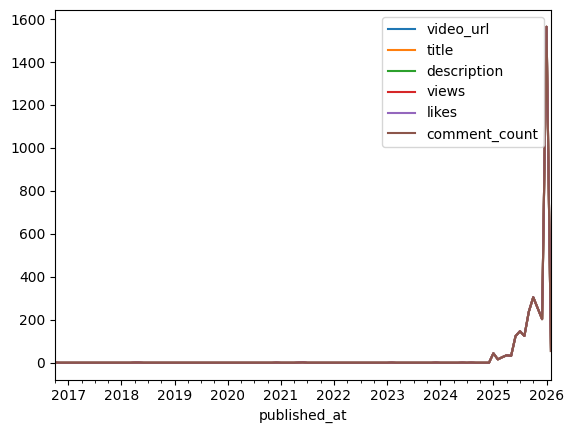

In [45]:
grouped = df.groupby(pd.Grouper(key='published_at',freq='ME')).count()
grouped.plot()


In [46]:
df.groupby(pd.Grouper(key='published_at',freq='ME')).count()

,video_url,title,description,views,likes,comment_count
published_at,,,,,,
2016-10-31,1,1,1,1,1,1
2016-11-30,0,0,0,0,0,0
2016-12-31,0,0,0,0,0,0
2017-01-31,0,0,0,0,0,0
2017-02-28,0,0,0,0,0,0
...,...,...,...,...,...,...
2025-10-31,305,305,305,305,305,305
2025-11-30,254,254,254,254,254,254
2025-12-31,203,203,203,203,203,203


In [47]:
df[df['published_at']< datetime(2025,1,20)]

,video_url,title,description,published_at,views,likes,comment_count
88,https://www.youtube.com/watch?v=l8dA9QNJZ8A,Mural inspires detainees at Prince George's Co...,It was a moment to celebrate in a place not kn...,2024-06-27 00:06:54,619,4,2
289,https://www.youtube.com/watch?v=JcPZ344NYwg,BORDER PATROL VS. ICE - WHAT'S THE DIFFERENCE?,Go to https://NordVPN.com/GeneralDischarge or ...,2021-06-18 21:02:05,156878,4521,529
324,https://www.youtube.com/watch?v=Ibk8iythdrw,Video released showing large fight inside Port...,The Portage County Sheriff's Office confirmed ...,2021-05-18 03:21:19,251411,619,63
330,https://www.youtube.com/watch?v=5oTx6Ih5rLA,US BORDER PATROL SPECIAL OPERATIONS GROUP (BOR...,Did you know that the U.S. Border Patrol has s...,2020-12-19 00:17:14,254408,7734,829
360,https://www.youtube.com/watch?v=hsjbB3l0CmQ,"Nightshift At The Las Vegas Detention Center, ...","Night Shift At The Las Vegas Detention Center,...",2023-02-01 21:25:21,23054,0,0
387,https://www.youtube.com/watch?v=_rWdFljytLo,PIX11 gets exclusive tour inside ICE detention...,"Until now, a television news crew has never be...",2018-05-24 02:59:47,9218,39,15
390,https://www.youtube.com/watch?v=iRUFgwy8SlY,🎥 Differences: CBP Officers vs. Border Patrol ...,🔗 Get fully prepared for the entrance exams: ...,2016-10-28 18:10:29,244591,2396,273
418,https://www.youtube.com/watch?v=6ZhyEW5fww4,Teenager's First Hours in Juvenile Detention,From our Archive: Viewers on our channel have ...,2021-06-06 17:22:00,1983337,20021,1194
429,https://www.youtube.com/watch?v=C-0bURq6wBo,Inside Juvenile Detention,"As recently as 2005, the state of Virginia had...",2018-04-02 19:24:14,2451471,28159,2061
431,https://www.youtube.com/watch?v=79pQmp_Wtns,24 HOURS INSIDE A JUVENILE DETENTION CENTER,In this video our cameras go behind the scenes...,2023-12-12 19:00:03,63605,548,65


In [49]:
df = df.drop(index= df[df['published_at'] < datetime(2025,1,20)].index)

In [50]:
df.groupby(pd.Grouper(key='published_at',freq='ME')).count()

,video_url,title,description,views,likes,comment_count
published_at,,,,,,
2025-01-31,43,43,43,43,43,43
2025-02-28,16,16,16,16,16,16
2025-03-31,26,26,26,26,26,26
2025-04-30,35,35,35,35,35,35
2025-05-31,32,32,32,32,32,32
2025-06-30,124,124,124,124,124,124
2025-07-31,147,147,147,147,147,147
2025-08-31,125,125,125,125,125,125
2025-09-30,238,238,238,238,238,238


In [51]:
df[df['published_at'] > datetime(2026,1,21)].sort_values(by='published_at')

,video_url,title,description,published_at,views,likes,comment_count
220,https://www.youtube.com/watch?v=sm2WYQfwlVQ,FULL PRESSER: Senators speak after touring Cal...,"California U.S. Senators Alex Padilla (D), Ran...",2026-01-21 00:29:37,3878,166,56
95,https://www.youtube.com/watch?v=7ohX3FyQuEw,Sen. Schiff and Padilla visit ICE Detention Fa...,Sen. Schiff and Padilla visit ICE Detention Fa...,2026-01-21 01:15:01,653,17,0
276,https://www.youtube.com/watch?v=uSJICEdHAX0,Watching a Minnesota ICE protest video at 3 am...,,2026-01-21 01:55:51,12473,448,32
87,https://www.youtube.com/watch?v=6_z_ijuVLW0,California senators raise concerns after touri...,"Latest Kern County, California and US and worl...",2026-01-21 02:09:09,175,5,2
67,https://www.youtube.com/watch?v=rsD27pSy7Qk,EXCLUSIVE: Fox gets candid view of ‘CATCH OF T...,Fox News correspondent Griff Jenkins reports o...,2026-01-21 03:01:03,172430,2803,795
...,...,...,...,...,...,...,...
782,https://www.youtube.com/watch?v=YDfnFaCYZRM,Surveillance video shows truck ramming Border ...,Footage released Monday capture part of the Ja...,2026-02-03 02:57:53,1141,9,0
826,https://www.youtube.com/watch?v=g45c5Vem6g0,Is ICE planning on building a detention center...,Reports claim ICE is close to purchasing a lar...,2026-02-03 04:48:21,1240,50,24
717,https://www.youtube.com/watch?v=4NZPnxtVLjs,Fullerton police chief denies claims his offic...,Fullerton's police chief denied allegations th...,2026-02-03 05:44:53,248,5,2
706,https://www.youtube.com/watch?v=2n8QNvl4rrc,Chula Vista City Council votes to condemn fede...,"Following a heated public debate, the Chula Vi...",2026-02-03 06:10:18,142,8,14


In [52]:
df = df.drop(index=df[df['published_at'] > datetime(2026,1,20)].index)

<Axes: xlabel='Datum van posten', ylabel='Hoeveelheid posts'>

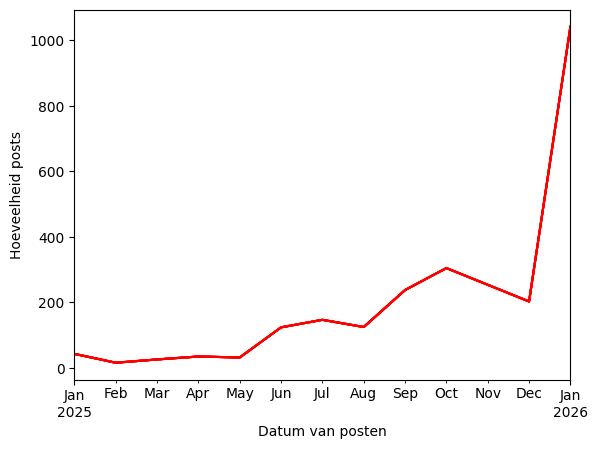

In [53]:

grouped = df.groupby(pd.Grouper(key='published_at',freq='ME')).count()


grouped.plot(legend=False,  color = 'r', xlabel='Datum van posten',ylabel='Hoeveelheid posts')

In [54]:
df

,video_url,title,description,published_at,views,likes,comment_count
0,https://www.youtube.com/watch?v=tvBXacseqvo,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",2026-01-19 18:38:55,110767,2229,405
1,https://www.youtube.com/watch?v=1NzKGtHhGUI,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,2026-01-19 19:03:26,7846,67,108
5,https://www.youtube.com/watch?v=O7wXXnElpb0,How immigration raid on Chicago apartments unf...,Residents of an apartment block in Chicago tha...,2025-10-13 21:45:03,65611,749,507
8,https://www.youtube.com/watch?v=EjplRxsjUCo,Border Patrol arrests more than 250 people in ...,Dramatic videos show encounters between federa...,2025-11-20 01:15:03,23501,66,64
10,https://www.youtube.com/watch?v=JddcoSUWTH0,What to know about U.S. Immigration and Custom...,The federal agency is responsible for arrestin...,2025-03-09 12:00:31,41649,565,134
...,...,...,...,...,...,...,...
3174,https://www.youtube.com/watch?v=7SghCZZwh0s,'Win for Trump': More migrants self-deporting ...,Rolling Stone reports that many migrants are s...,2025-08-28 16:21:53,59749,587,1041
3175,https://www.youtube.com/watch?v=u1YhpsuxODY,ICE Raids: Fox News reporter witnesses mass de...,Fox News' Bill Melugin shares key takeaways fr...,2025-01-23 20:15:02,1701891,31419,8442
3176,https://www.youtube.com/watch?v=XrrjwyA3d58,Trump delays deportation of Korean workers aft...,US President Donald Trump has intervened to ha...,2025-09-11 10:00:04,147448,1865,2134
3177,https://www.youtube.com/watch?v=EleiQ6Y2F2U,ICE agents take illegal migrants out of factory,ICE agents take illegal migrants out of a fact...,2025-06-12 17:00:17,328133,15721,3235


In [55]:
df = df.reset_index(drop=True)

In [56]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import KeyBERTInspired

In [57]:
df['all_text'] = df['title'] + ' ' + df['description']

In [58]:
df

,video_url,title,description,published_at,views,likes,comment_count,all_text
0,https://www.youtube.com/watch?v=tvBXacseqvo,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",2026-01-19 18:38:55,110767,2229,405,Police chief reacts to video of ICE dragging w...
1,https://www.youtube.com/watch?v=1NzKGtHhGUI,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,2026-01-19 19:03:26,7846,67,108,ICE protests push back against local immigrati...
2,https://www.youtube.com/watch?v=O7wXXnElpb0,How immigration raid on Chicago apartments unf...,Residents of an apartment block in Chicago tha...,2025-10-13 21:45:03,65611,749,507,How immigration raid on Chicago apartments unf...
3,https://www.youtube.com/watch?v=EjplRxsjUCo,Border Patrol arrests more than 250 people in ...,Dramatic videos show encounters between federa...,2025-11-20 01:15:03,23501,66,64,Border Patrol arrests more than 250 people in ...
4,https://www.youtube.com/watch?v=JddcoSUWTH0,What to know about U.S. Immigration and Custom...,The federal agency is responsible for arrestin...,2025-03-09 12:00:31,41649,565,134,What to know about U.S. Immigration and Custom...
...,...,...,...,...,...,...,...,...
2585,https://www.youtube.com/watch?v=7SghCZZwh0s,'Win for Trump': More migrants self-deporting ...,Rolling Stone reports that many migrants are s...,2025-08-28 16:21:53,59749,587,1041,'Win for Trump': More migrants self-deporting ...
2586,https://www.youtube.com/watch?v=u1YhpsuxODY,ICE Raids: Fox News reporter witnesses mass de...,Fox News' Bill Melugin shares key takeaways fr...,2025-01-23 20:15:02,1701891,31419,8442,ICE Raids: Fox News reporter witnesses mass de...
2587,https://www.youtube.com/watch?v=XrrjwyA3d58,Trump delays deportation of Korean workers aft...,US President Donald Trump has intervened to ha...,2025-09-11 10:00:04,147448,1865,2134,Trump delays deportation of Korean workers aft...
2588,https://www.youtube.com/watch?v=EleiQ6Y2F2U,ICE agents take illegal migrants out of factory,ICE agents take illegal migrants out of a fact...,2025-06-12 17:00:17,328133,15721,3235,ICE agents take illegal migrants out of factor...


In [59]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
text = df.all_text.tolist()

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     | Details
------------------------+------------+--------
embeddings.position_ids | UNEXPECTED |        

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [64]:
## Pre-Embedding 
if not os.path.isfile(os.getcwd() + '/modellen/embeddings-yt-2.npy'):
    print('Geen opgeslagen embeddings gevonden, zelf aanmaken:')
    embeddings = sentence_model.encode(text, show_progress_bar=True)
    
    with open(os.getcwd() + '/modellen/embeddings-yt-2.npy', 'wb') as f:
        np.save(f, embeddings)
else:
    print('Opgeslagen embeddings gevonden, laden:')
    embeddings = np.load(os.getcwd() + '/modellen/embeddings-yt-2.npy')

Opgeslagen embeddings gevonden, laden:


In [65]:
## Setting up UMAP
umap_model = UMAP(n_neighbors=25, n_components=5, min_dist=0.05, metric='cosine', 
            random_state = 711, verbose=True)
    
## Setting up HDBSCAN 
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=10, prediction_data=True)
    
representation_model = KeyBERTInspired()
    
topic_model = BERTopic(
    embedding_model=sentence_model, 
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model
)

topics, probs = topic_model.fit_transform(text, embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, n_components=5, n_jobs=1, n_neighbors=25, random_state=711, verbose=True)
Sun Feb 22 21:31:24 2026 Construct fuzzy simplicial set
Sun Feb 22 21:31:28 2026 Finding Nearest Neighbors
Sun Feb 22 21:31:29 2026 Finished Nearest Neighbor Search
Sun Feb 22 21:31:29 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Feb 22 21:31:32 2026 Finished embedding


In [66]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,23,-1_detention_ice_news_newsmakers,"[detention, ice, news, newsmakers, investigati...",[Construction site ICE raid in Minnesota: Late...
1,0,2388,0_immigration_police_officers_patrol,"[immigration, police, officers, patrol, cbsnew...",[37 people arrested in large-scale immigration...
2,1,127,1_foxnews_news_foxnewsgo_ice,"[foxnews, news, foxnewsgo, ice, primetime, wat...",[Protesters STORM Minneapolis hotel where ICE ...
3,2,52,2_immigration_msnbc_detained_enforcement,"[immigration, msnbc, detained, enforcement, ne...",[ICE Conducts Largest-Ever Raid at Georgia Hyu...


Maar drie topics, dus wat parameters veranderen. n_neigbors naar 10 gezet en min_samples naar 5. cluster_size hetzelfde, gezien dit niet geraakt wordt. min_dist is ook lager gezet.

In [77]:
## Setting up UMAP
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.025, metric='cosine', 
            random_state = 711, verbose=True)
    
## Setting up HDBSCAN 
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=5, prediction_data=True)
    
representation_model = KeyBERTInspired()
    
topic_model = BERTopic(
    embedding_model=sentence_model, 
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model
)

topics, probs = topic_model.fit_transform(text, embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.025, n_components=5, n_jobs=1, n_neighbors=10, random_state=711, verbose=True)
Sun Feb 22 21:35:31 2026 Construct fuzzy simplicial set
Sun Feb 22 21:35:35 2026 Finding Nearest Neighbors
Sun Feb 22 21:35:35 2026 Finished Nearest Neighbor Search
Sun Feb 22 21:35:35 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Feb 22 21:35:38 2026 Finished embedding


In [78]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,812,-1_immigration_protesters_protests_patrol,"[immigration, protesters, protests, patrol, ab...",[Noem Calls Minneapolis ICE Shooting Incident ...
1,0,206,0_ice_viral_la_watch,"[ice, viral, la, watch, videos, instagram, we,...",[JJ's Summer Ice Cream Song 🍦 CoComelon Nurser...
2,1,191,1_breakingnews_immigration_protesters_news,"[breakingnews, immigration, protesters, news, ...",[RENEE GOOD MINNESOTA AND NATIONWIDE ICE PROTE...
3,2,167,2_arrests_immigration_deportation_patrol,"[arrests, immigration, deportation, patrol, pr...",[Chicago students rally outside Trump Tower as...
4,3,157,3_arrests_deportations_deportation_deported,"[arrests, deportations, deportation, deported,...",[ICE AGENTS RAID HOME DEPOT In New York Arrest...
5,4,136,4_follownbc_readnbc_nbcnews_ice,"[follownbc, readnbc, nbcnews, ice, cbsnews, ne...",[What we know about the Texas Border Patrol fa...
6,5,131,5_enforcement_police_incident_investigation,"[enforcement, police, incident, investigation,...",[Suspect named in shooting of Border Patrol ag...
7,6,127,6_news_foxnews_primetime_foxnewsgo,"[news, foxnews, primetime, foxnewsgo, video, i...",[WATCH: Protesters CLASH with ICE agents in Ch...
8,7,110,7_arrests_detention_immigration_detainees,"[arrests, detention, immigration, detainees, a...",[A Virginia home behind the $1.24B Fort Bliss ...
9,8,99,8_protests_protesters_ice_protest,"[protests, protesters, ice, protest, immigrati...",[Watch: ICE Raid Caught on Ring Camera in Minn...


15 topics is een stuk beter. Kijkend naar de 'representation' zijn dit redelijke topics. De outliers zouden ook een plek moeten kunnen vinden. Eerst een visualisatie:

In [79]:
new_topics = topic_model.reduce_outliers(text, topics, strategy="embeddings")

In [80]:
topic_model.update_topics(text, topics=new_topics)

2026-02-22 21:36:37,507 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [81]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,222,0_ice_cream_https_and,"[ice, cream, https, and, my, to, the, com, kid...",[JJ's Summer Ice Cream Song 🍦 CoComelon Nurser...
1,1,301,1_minneapolis_the_and_ice,"[minneapolis, the, and, ice, in, of, to, shoot...",[RENEE GOOD MINNESOTA AND NATIONWIDE ICE PROTE...
2,2,233,2_chicago_the_in_ice,"[chicago, the, in, ice, to, and, of, https, im...",[Chicago students rally outside Trump Tower as...
3,3,288,3_immigration_ice_and_the,"[immigration, ice, and, the, in, to, of, raid,...",[ICE AGENTS RAID HOME DEPOT In New York Arrest...
4,4,191,4_news_cbs_nbc_nbcnews,"[news, cbs, nbc, nbcnews, com, cbsnews, https,...",[What we know about the Texas Border Patrol fa...
5,5,190,5_border_the_patrol_and,"[border, the, patrol, and, in, of, to, on, htt...",[Suspect named in shooting of Border Patrol ag...
6,6,131,6_fox_foxnews_news_shows,"[fox, foxnews, news, shows, video, www, com, t...",[WATCH: Protesters CLASH with ICE agents in Ch...
7,7,145,7_detention_center_com_the,"[detention, center, com, the, https, to, www, ...",[A Virginia home behind the $1.24B Fort Bliss ...
8,8,129,8_new_york_nypost_post,"[new, york, nypost, post, com, https, the, www...",[Watch: ICE Raid Caught on Ring Camera in Minn...
9,9,159,9_https_com_www_the,"[https, com, www, the, to, on, youtube, tyt, a...",[Civilians Get Under ICE Agent's Skin After He...


In de visualisatie kan je zien dat er veel topics overlappen, linksboven. Ook is duidelijjk te zijn welke drie topics er eerder waren gekregen.

Topic 0 lijkt niet over ICE te gaan, maar over ijs. Deze wordt verder geanalyseerd:

In [84]:
topic_model.get_representative_docs(0)

["JJ's Summer Ice Cream Song 🍦 CoComelon Nursery Rhymes and Kids Songs | 3 HOURS | After School Club ⭐ Welcome to the Moonbug Kids After School Club! Kick back and relax with some fun-filled content from your FAVORITE Moonbug friends.\r\n\r\nJoin JJ and his friends in the latest adventures of CoComelon!\r\n\r\nJJ's Dad helps JJ stay cool on a hot day by showing him how to make “Fresh Fruit Ice Cream”\r\n\r\nSUBSCRIBE HERE:   \r\n\r\n(🔔) SUBSCRIBE and watch new CoComelon cartoons for toddlers weekly! https://www.youtube.com/c/CoComelon?sub_confirmation=1\r\n\r\n(🔔) https://www.youtube.com/@MoonbugKids_AfterSchoolClub/?sub_confirmation=1\r\n_______________________________________________\r\n🍉LYRICS\r\n\r\nIt's really hot, \r\nLet's take a break\r\nI know a snack that we can make\r\nI'll teach you my cool recipe\r\n-For fresh fruit ice cream\r\nTry it with me!\r\nFresh fruit ice cream,\r\nWhat a sweet treat!\r\nFresh fruit ice cream,\r\nYummy to eat!\r\nWe choose the fruit,\r\nOne, two, a

Dit geeft alleen maar posts over ijs

In [93]:
df["Topic"] = new_topics
df[df["Topic"]==0].sort_values(by='views',ascending=False).head(60)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
605,https://www.youtube.com/watch?v=OZnEzCImIQk,Oops...Her Tongue Froze to the Ice Cream,Oops...Her Tongue Froze to the Ice Cream,2025-08-20 07:30:23,287683304,0,1144,Oops...Her Tongue Froze to the Ice Cream Oops....,0
321,https://www.youtube.com/watch?v=CcAO9IwVB88,Mom's Ice Cream Truck Story,Mom's Ice Cream Truck - Story\nThief robs Mom'...,2025-03-16 12:10:47,173944830,377741,0,Mom's Ice Cream Truck Story Mom's Ice Cream Tr...,0
390,https://www.youtube.com/watch?v=vbinE79Az-k,👷‍♀️👷‍♀️👷‍♀️#icequeen #ice #galkina_anechka #w...,,2025-01-26 07:40:02,168343852,1209693,2760,👷‍♀️👷‍♀️👷‍♀️#icequeen #ice #galkina_anechka #w...,0
273,https://www.youtube.com/watch?v=cbFHDfPjItU,Make Colorful Ice Cream! 🌈🍦 Learning Colors Is...,#billyblipboss\nSubscribe to the Billy Blip Bo...,2025-09-10 13:01:29,158453110,1116102,0,Make Colorful Ice Cream! 🌈🍦 Learning Colors Is...,0
370,https://www.youtube.com/watch?v=cietIfIG5Vw,Asking for NO ICE Drinks over the years 🧊,Join the ✨MOOCHIS MEMBERSHIP✨ to get access to...,2025-06-11 12:30:42,148165834,1568754,3175,Asking for NO ICE Drinks over the years 🧊 Join...,0
...,...,...,...,...,...,...,...,...,...
731,https://www.youtube.com/watch?v=tCSH6FPiIqI,ICE Unalived Renee Good 🇺🇸 🦅 #reneegood #short...,ICE MURD*RED Renee Good 🇺🇸 🦅 #reneegood #dhs #...,2026-01-19 21:20:01,39,5,4,ICE Unalived Renee Good 🇺🇸 🦅 #reneegood #short...,0
757,https://www.youtube.com/watch?v=W-G0OsR7PtE,🧊icequeen ice#loveingice#frozen #cold #iceque...,video like:https://youtube.com/shorts/NRVwmxd_...,2025-05-04 03:00:36,14,1,0,🧊icequeen ice#loveingice#frozen #cold #iceque...,0
758,https://www.youtube.com/watch?v=l0Gaj09pMsM,#ice ☎️☎️📱#icequeen #viralvideo#winterqueen,https://youtube.com/shorts/pm_UbnYd46U?si=nV-w...,2025-04-11 03:00:49,8,2,1,#ice ☎️☎️📱#icequeen #viralvideo#winterqueen ht...,0
741,https://www.youtube.com/watch?v=lLWuVH3DMU4,#snow #automobile #ice #travel #peakyblinders,,2026-01-16 12:03:47,3,0,0,#snow #automobile #ice #travel #peakyblinders,0


Gezien de top 60 video's allemaal niet over ICE gaan, is er besloten deze categorie te laten vallen.

In [109]:
# df = df.drop(df[df["Topic"]==0].index)
# df = df.drop(columns="Topic")
text = df.all_text.tolist()

In [111]:
## Pre-Embedding 
if not os.path.isfile(os.getcwd() + '/modellen/embeddings-yt-3.npy'):
    print('Geen opgeslagen embeddings gevonden, zelf aanmaken:')
    embeddings = sentence_model.encode(text, show_progress_bar=True)
    
    with open(os.getcwd() + '/modellen/embeddings-yt-3.npy', 'wb') as f:
        np.save(f, embeddings)
else:
    print('Opgeslagen embeddings gevonden, laden:')
    embeddings = np.load(os.getcwd() + '/modellen/embeddings-yt-3.npy')

Geen opgeslagen embeddings gevonden, zelf aanmaken:


Batches:   0%|          | 0/74 [00:00<?, ?it/s]

In [116]:
## Setting up UMAP
umap_model = UMAP(n_neighbors=8, n_components=5, min_dist=0.025, metric='cosine', 
            random_state = 711, verbose=True)
    
## Setting up HDBSCAN 
hdbscan_model = HDBSCAN(min_cluster_size=50, min_samples=5, prediction_data=True)
    
representation_model = KeyBERTInspired()
    
topic_model = BERTopic(
    embedding_model=sentence_model, 
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model
)

topics, probs = topic_model.fit_transform(text, embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.025, n_components=5, n_jobs=1, n_neighbors=8, random_state=711, verbose=True)
Sun Feb 22 22:09:18 2026 Construct fuzzy simplicial set
Sun Feb 22 22:09:22 2026 Finding Nearest Neighbors
Sun Feb 22 22:09:23 2026 Finished Nearest Neighbor Search
Sun Feb 22 22:09:23 2026 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Feb 22 22:09:25 2026 Finished embedding


In [117]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,818,-1_arrests_immigration_protesters_protests,"[arrests, immigration, protesters, protests, p...",[Noem Calls Minneapolis ICE Shooting Incident ...
1,0,336,0_immigration_officers_officer_enforcement,"[immigration, officers, officer, enforcement, ...",[MINNESOTA PORTLAND LOS ANGELES ICE PROTESTS R...
2,1,163,1_deportation_arrests_immigration_protesters,"[deportation, arrests, immigration, protesters...",[Chicago students rally outside Trump Tower as...
3,2,144,2_cbsnews_follownbc_cbseveningnews_nbcnews,"[cbsnews, follownbc, cbseveningnews, nbcnews, ...",[What we know about the Texas Border Patrol fa...
4,3,141,3_immigrationnews_arrests_deportations_deporta...,"[immigrationnews, arrests, deportations, depor...",[ICE Crackdown at Airport & Black Friday Mall:...
5,4,128,4_foxnews_foxnewsgo_news_fox,"[foxnews, foxnewsgo, news, fox, follow, baier,...",[WATCH: Protesters CLASH with ICE agents in Ch...
6,5,110,5_protests_ice_enforcement_protest,"[protests, ice, enforcement, protest, proteste...",[Watch: ICE Raid Caught on Ring Camera in Minn...
7,6,98,6_news_ice_police_patrol,"[news, ice, police, patrol, hospital, article,...",[Update from hospital shooting scene: FBI now ...
8,7,85,7_legaleagle_mma_attorney_lawyer,"[legaleagle, mma, attorney, lawyer, prepare, a...",[Civilians Get Under ICE Agent's Skin After He...
9,8,83,8_police_patrol_enforcement_incident,"[police, patrol, enforcement, incident, office...",[1 Hour of Shocking Footage: U.S Border Patrol...


In [118]:
new_topics = topic_model.reduce_outliers(text, topics, strategy="embeddings")

In [119]:
topic_model.update_topics(text, topics=new_topics)

2026-02-22 22:10:11,122 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [120]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,454,0_minneapolis_the_ice_and,"[minneapolis, the, ice, and, in, of, to, shoot...",[MINNESOTA PORTLAND LOS ANGELES ICE PROTESTS R...
1,1,220,1_chicago_the_in_and,"[chicago, the, in, and, to, ice, https, of, co...",[Chicago students rally outside Trump Tower as...
2,2,212,2_news_cbs_com_nbc,"[news, cbs, com, nbc, nbcnews, https, cbsnews,...",[What we know about the Texas Border Patrol fa...
3,3,266,3_ice_immigration_and_the,"[ice, immigration, and, the, in, to, of, raid,...",[ICE Crackdown at Airport & Black Friday Mall:...
4,4,132,4_fox_foxnews_news_shows,"[fox, foxnews, news, shows, video, www, com, t...",[WATCH: Protesters CLASH with ICE agents in Ch...
5,5,163,5_new_york_com_nypost,"[new, york, com, nypost, https, post, www, the...",[Watch: ICE Raid Caught on Ring Camera in Minn...
6,6,129,6_portland_the_shot_border,"[portland, the, shot, border, in, patrol, http...",[Update from hospital shooting scene: FBI now ...
7,7,151,7_https_com_www_to,"[https, com, www, to, the, youtube, on, tyt, a...",[Civilians Get Under ICE Agent's Skin After He...
8,8,135,8_border_the_patrol_and,"[border, the, patrol, and, of, to, in, on, cbp...",[1 Hour of Shocking Footage: U.S Border Patrol...
9,9,219,9_ice_the_in_and,"[ice, the, in, and, to, of, was, agents, for, on]",[ICE AGENTS DRAG ILLEGAL IMMIGRANT Out Of Cour...


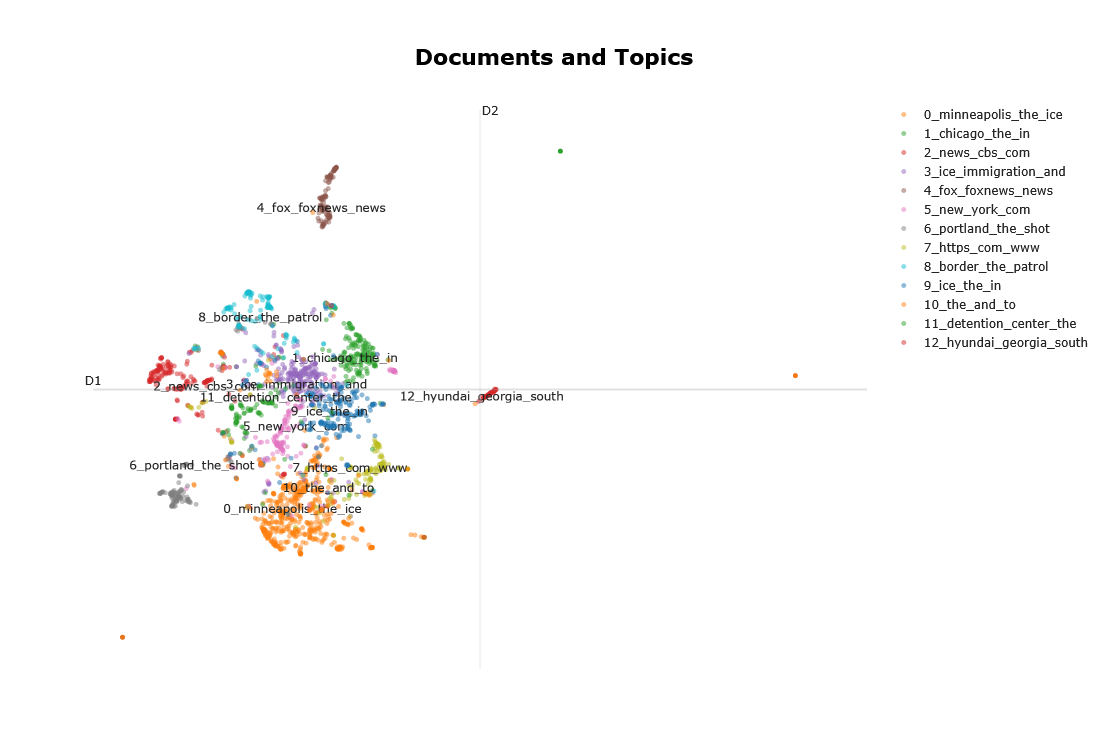

In [121]:
topic_model.visualize_documents(text, embeddings=embeddings)

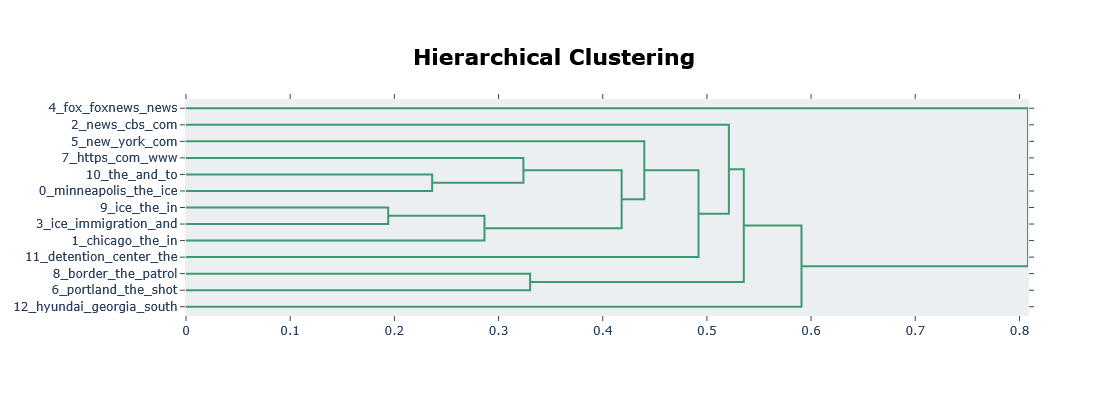

In [122]:
topic_model.visualize_hierarchy()

In [123]:
topic_model.save(
    path=os.getcwd() + '/modellen/topic-model-yt-3',
    serialization="safetensors",
    save_ctfidf=True,
    save_embedding_model="all-MiniLM-L6-v2"
)

In [124]:
df["Topic"] = new_topics
df.head()

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
0,https://www.youtube.com/watch?v=tvBXacseqvo,Police chief reacts to video of ICE dragging w...,"“It pisses me off to see that, to see men doin...",2026-01-19 18:38:55,110767,2229,405,Police chief reacts to video of ICE dragging w...,0
1,https://www.youtube.com/watch?v=1NzKGtHhGUI,ICE protests push back against local immigrati...,Protesters gathered in Highland Parl after rec...,2026-01-19 19:03:26,7846,67,108,ICE protests push back against local immigrati...,3
2,https://www.youtube.com/watch?v=O7wXXnElpb0,How immigration raid on Chicago apartments unf...,Residents of an apartment block in Chicago tha...,2025-10-13 21:45:03,65611,749,507,How immigration raid on Chicago apartments unf...,1
3,https://www.youtube.com/watch?v=EjplRxsjUCo,Border Patrol arrests more than 250 people in ...,Dramatic videos show encounters between federa...,2025-11-20 01:15:03,23501,66,64,Border Patrol arrests more than 250 people in ...,2
4,https://www.youtube.com/watch?v=JddcoSUWTH0,What to know about U.S. Immigration and Custom...,The federal agency is responsible for arrestin...,2025-03-09 12:00:31,41649,565,134,What to know about U.S. Immigration and Custom...,2


In [125]:
df_topics = topic_model.get_topic_info()

In [126]:
df_topics

,Topic,Count,Name,Representation,Representative_Docs
0,0,454,0_minneapolis_the_ice_and,"[minneapolis, the, ice, and, in, of, to, shoot...",[MINNESOTA PORTLAND LOS ANGELES ICE PROTESTS R...
1,1,220,1_chicago_the_in_and,"[chicago, the, in, and, to, ice, https, of, co...",[Chicago students rally outside Trump Tower as...
2,2,212,2_news_cbs_com_nbc,"[news, cbs, com, nbc, nbcnews, https, cbsnews,...",[What we know about the Texas Border Patrol fa...
3,3,266,3_ice_immigration_and_the,"[ice, immigration, and, the, in, to, of, raid,...",[ICE Crackdown at Airport & Black Friday Mall:...
4,4,132,4_fox_foxnews_news_shows,"[fox, foxnews, news, shows, video, www, com, t...",[WATCH: Protesters CLASH with ICE agents in Ch...
5,5,163,5_new_york_com_nypost,"[new, york, com, nypost, https, post, www, the...",[Watch: ICE Raid Caught on Ring Camera in Minn...
6,6,129,6_portland_the_shot_border,"[portland, the, shot, border, in, patrol, http...",[Update from hospital shooting scene: FBI now ...
7,7,151,7_https_com_www_to,"[https, com, www, to, the, youtube, on, tyt, a...",[Civilians Get Under ICE Agent's Skin After He...
8,8,135,8_border_the_patrol_and,"[border, the, patrol, and, of, to, in, on, cbp...",[1 Hour of Shocking Footage: U.S Border Patrol...
9,9,219,9_ice_the_in_and,"[ice, the, in, and, to, of, was, agents, for, on]",[ICE AGENTS DRAG ILLEGAL IMMIGRANT Out Of Cour...


In [127]:
# export van topics en data
df_topics.to_json('../Data/topic_modeling/yt-topics-3.json.gz', orient='records', compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
df.to_json('../Data/topic_modeling/yt-clean-withtopics-3.json.gz', orient='records', compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

In [170]:
grouped_1 = df.groupby('Topic', as_index=False)[['likes','views','comment_count']].sum().sort_values(by='views', ascending=False)
grouped_1 = pd.merge(grouped_1, df_topics[['Topic','Count']], on='Topic', how='inner')
grouped_1 = grouped_1.astype({'Topic':str})
grouped_1

,Topic,likes,views,comment_count,Count
0,0,3847875,156520197,1206359,454
1,7,5846920,134646948,647938,151
2,3,1974965,101695079,306160,266
3,10,3033333,99304202,411510,141
4,9,2104718,84970122,495278,219
5,2,1487396,75151529,406057,212
6,4,1491070,63485028,441290,132
7,5,807190,43299659,272051,163
8,1,829869,27299688,207764,220
9,8,225675,21374452,41589,135


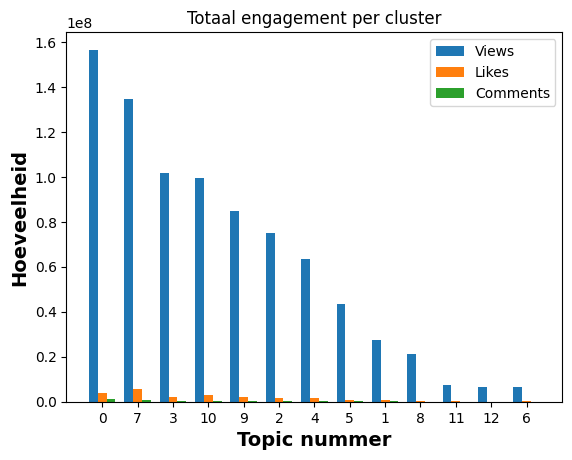

In [171]:
x_1 = grouped_1['Topic']
y_1 = grouped_1['views']
y_2 = grouped_1['likes']
y_3 = grouped_1['comment_count']


bar_width = 0.25
x = np.arange(len(grouped_1))

plt.bar(x - bar_width, y_1, width=bar_width, label='Views')
plt.bar(x, y_2, width=bar_width, label='Likes')
plt.bar(x + bar_width, y_3, width=bar_width, label='Comments')


plt.xlabel('Topic nummer', fontweight='bold',fontsize=14)
plt.ylabel('Hoeveelheid', fontweight='bold',fontsize=14)
plt.xticks(x, x_1)
plt.title("Totaal engagement per cluster")
plt.legend()
plt.show()

Niet overzichtelijk, dus laten we het gemiddelde nemen en weergeven per type engagement.

In [172]:
grouped_1 = grouped_1.astype({'Topic':int})

grouped_1['gem_likes'] = grouped_1['likes']/grouped_1['Count']
grouped_1['gem_views'] = grouped_1['views']/grouped_1['Count']
grouped_1['gem_comment'] = grouped_1['comment_count']/grouped_1['Count']

grouped_1 = grouped_1.sort_values(by ='gem_likes', ascending=False)
grouped_1

,Topic,likes,views,comment_count,Count,gem_likes,gem_views,gem_comment
1,7,5846920,134646948,647938,151,38721.324503,891701.642384,4290.980132
3,10,3033333,99304202,411510,141,21513.000000,704285.120567,2918.510638
6,4,1491070,63485028,441290,132,11295.984848,480947.181818,3343.106061
4,9,2104718,84970122,495278,219,9610.584475,387991.424658,2261.543379
0,0,3847875,156520197,1206359,454,8475.495595,344758.143172,2657.178414
2,3,1974965,101695079,306160,266,7424.680451,382312.327068,1150.977444
5,2,1487396,75151529,406057,212,7016.018868,354488.344340,1915.363208
7,5,807190,43299659,272051,163,4952.085890,265642.079755,1669.024540
8,1,829869,27299688,207764,220,3772.131818,124089.490909,944.381818
10,11,299875,7544862,44504,91,3295.329670,82910.571429,489.054945


In [173]:
grouped_2 = df.groupby('Topic', as_index=False)[['likes','views','comment_count']].median().rename(columns={'likes':'med_likes','views':'med_views','comment_count':'med_comments'})
grouped_3 = grouped_1.merge(grouped_2, on='Topic')
grouped_3 = grouped_3.astype({'Topic':str})
grouped_3

,Topic,likes,views,comment_count,Count,gem_likes,gem_views,gem_comment,med_likes,med_views,med_comments
0,7,5846920,134646948,647938,151,38721.324503,891701.642384,4290.980132,14148.0,354581.0,2468.0
1,10,3033333,99304202,411510,141,21513.000000,704285.120567,2918.510638,7132.0,276115.0,1722.0
2,4,1491070,63485028,441290,132,11295.984848,480947.181818,3343.106061,6506.0,317445.5,2092.0
3,9,2104718,84970122,495278,219,9610.584475,387991.424658,2261.543379,863.0,54430.0,516.0
4,0,3847875,156520197,1206359,454,8475.495595,344758.143172,2657.178414,856.0,76028.5,626.0
5,3,1974965,101695079,306160,266,7424.680451,382312.327068,1150.977444,295.0,25129.5,153.0
6,2,1487396,75151529,406057,212,7016.018868,354488.344340,1915.363208,452.5,57230.0,368.5
7,5,807190,43299659,272051,163,4952.085890,265642.079755,1669.024540,727.0,50919.0,447.0
8,1,829869,27299688,207764,220,3772.131818,124089.490909,944.381818,297.0,28295.0,191.5
9,11,299875,7544862,44504,91,3295.329670,82910.571429,489.054945,50.0,3780.0,18.0


In [174]:
grouped_3_top = grouped_3.sort_values(by='views').tail(5)

x_1 = grouped_3_top['Topic']
y_1 = grouped_3_top['views']

grouped_3_top = grouped_3.sort_values(by='likes').tail(5)
x_2 = grouped_3_top['Topic']
y_2 = grouped_3_top['likes']

grouped_3_top = grouped_3.sort_values(by='comment_count').tail(5)
x_3 = grouped_3_top['Topic']
y_3 = grouped_3_top['comment_count']

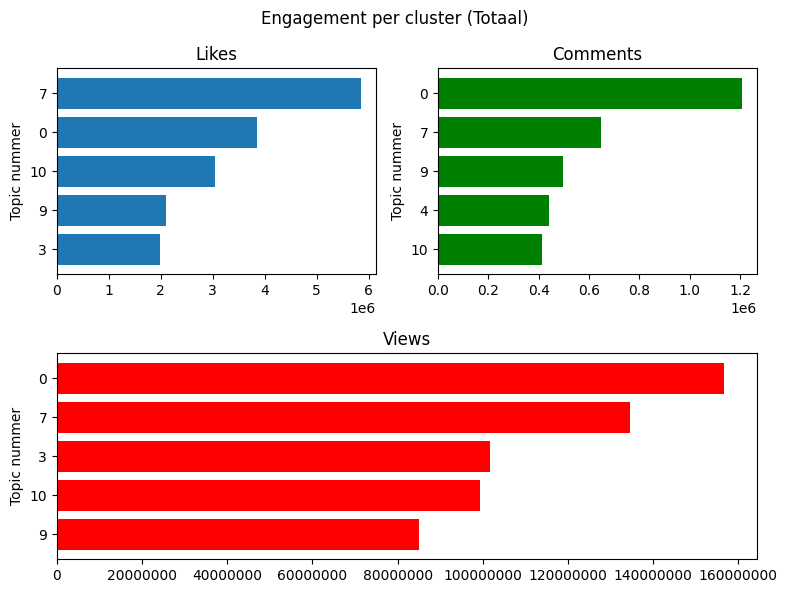

In [176]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.barh(x_1,y_1,color='r')
plt.ylabel("Topic nummer")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Views")

plt.subplot(2,2,1)
plt.barh(x_2,y_2)
plt.ylabel("Topic nummer")
plt.title("Likes")

plt.subplot(2,2,2)
plt.barh(x_3,y_3, color='g')
plt.ylabel("Topic nummer")
plt.title("Comments")

plt.suptitle("Engagement per cluster (Totaal)")
plt.tight_layout()
plt.show()

In [159]:
grouped_3_top = grouped_3.sort_values(by='gem_views').tail(5)

x_1 = grouped_3_top['Topic']
y_1 = grouped_3_top['gem_views']

grouped_3_top = grouped_3.sort_values(by='gem_likes').tail(5)
x_2 = grouped_3_top['Topic']
y_2 = grouped_3_top['gem_likes']

grouped_3_top = grouped_3.sort_values(by='gem_comment').tail(5)
x_3 = grouped_3_top['Topic']
y_3 = grouped_3_top['gem_comment']

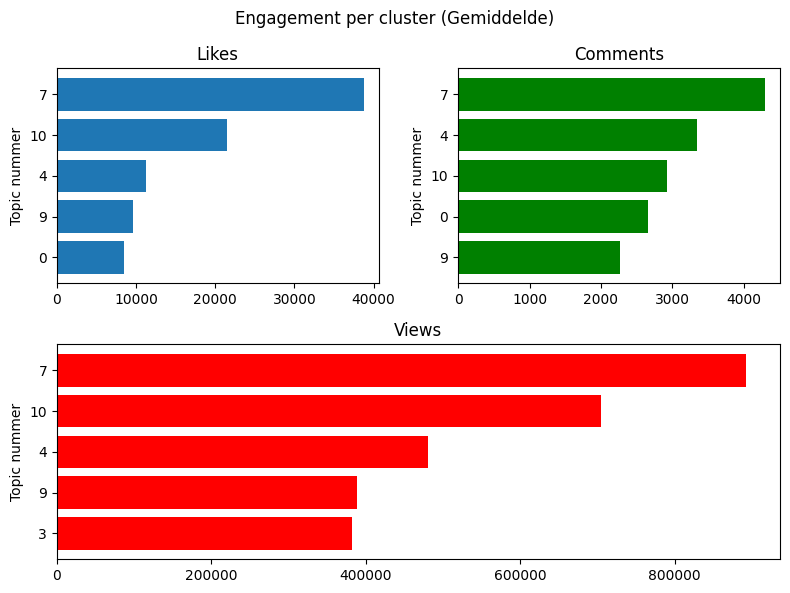

In [160]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.barh(x_1,y_1,color='r')
plt.ylabel("Topic nummer")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Views")

plt.subplot(2,2,1)
plt.barh(x_2,y_2)
plt.ylabel("Topic nummer")
plt.title("Likes")

plt.subplot(2,2,2)
plt.barh(x_3,y_3, color='g')
plt.ylabel("Topic nummer")
plt.title("Comments")

plt.suptitle("Engagement per cluster (Gemiddelde)")
plt.tight_layout()
plt.show()

In [161]:
grouped_3_top = grouped_3.sort_values(by='med_views').tail(5)

x_1 = grouped_3_top['Topic']
y_1 = grouped_3_top['med_views']

grouped_3_top = grouped_3.sort_values(by='med_likes').tail(5)
x_2 = grouped_3_top['Topic']
y_2 = grouped_3_top['med_likes']

grouped_3_top = grouped_3.sort_values(by='med_comments').tail(5)
x_3 = grouped_3_top['Topic']
y_3 = grouped_3_top['med_comments']

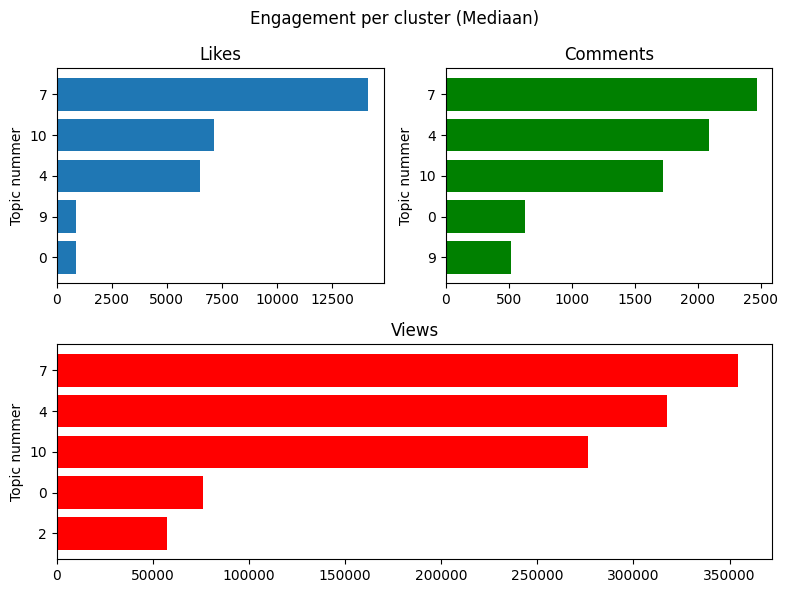

In [162]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.barh(x_1,y_1,color='r')
plt.ylabel("Topic nummer")
plt.ticklabel_format(style='plain', axis='x')
plt.title("Views")

plt.subplot(2,2,1)
plt.barh(x_2,y_2)
plt.ylabel("Topic nummer")
plt.title("Likes")

plt.subplot(2,2,2)
plt.barh(x_3,y_3, color='g')
plt.ylabel("Topic nummer")
plt.title("Comments")

plt.suptitle("Engagement per cluster (Mediaan)")
plt.tight_layout()
plt.show()

In [178]:
pd.set_option('display.max_colwidth', 0)
df_topics[df_topics['Topic'].isin([7,0,10,9,3,4])][['Topic','Count','Representation']]

,Topic,Count,Representation
0,0,454,"[minneapolis, the, ice, and, in, of, to, shooting, on, https]"
3,3,266,"[ice, immigration, and, the, in, to, of, raid, raids, deportation]"
4,4,132,"[fox, foxnews, news, shows, video, www, com, the, https, brand]"
7,7,151,"[https, com, www, to, the, youtube, on, tyt, and, show]"
9,9,219,"[ice, the, in, and, to, of, was, agents, for, on]"
10,10,141,"[the, and, to, of, https, ms, msnbc, com, www, ice]"


In [182]:
df[df["Topic"]==0].sort_values(by="views",ascending=False)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
2285,https://www.youtube.com/watch?v=Dv9OnatuuRY,Anti-ICE Protesters FIGHT with Police,,2025-06-06 18:56:44,11410890,207689,19552,Anti-ICE Protesters FIGHT with Police,0
426,https://www.youtube.com/watch?v=3rWFPRX4VXo,Uber driver confronts ICE agent at Minneapolis airport,"“You guys leave the border and go harass people based on the colour of their skin?”\nAn Uber driver at Minneapolis-St. Paul Airport confronted Immigration and Customs Enforcement (ICE) agents over a random ID check.\nThe Uber driver referenced the recent killing of Renee Nicole Good by ICE agents, an incident that has sparked global outrage and widespread protest across the US.\n\n\n\nSupport stories that matter. Join this channel to get access to perks:\nhttps://www.youtube.com/channel/UCR0fZh5SBxxMNYdg0VzRFkg/join\n\nCatch previous episodes of MEE LIVE, our biweekly news programme exploring the stories shaping our world through breaking coverage, expert analysis, and hard-hitting interviews.\n\nOriginally airing Tuesdays & Thursdays at 12pm ET | 5pm BST\nGot a story tip or question? Reach us at MEELive@middleeasteye.org\n\nSubscribe to our channel: http://ow.ly/AVlW30n1OWH\n\nSubscribe to MEE Telegram channel to stay up to date: https://t.me/MiddleEastEye_TG\n\nMiddle East Eye Website: https://middleeasteye.net\nFollow us on TikTok: https://www.tiktok.com/@middleeasteye\nFollow us on Instagram: https://instagram.com/MiddleEastEye\nLike us on Facebook: https://facebook.com/MiddleEastEye\nFollow us on Twitter: https://twitter.com/MiddleEastEye",2026-01-08 17:22:45,8600917,211639,25433,"Uber driver confronts ICE agent at Minneapolis airport “You guys leave the border and go harass people based on the colour of their skin?”\nAn Uber driver at Minneapolis-St. Paul Airport confronted Immigration and Customs Enforcement (ICE) agents over a random ID check.\nThe Uber driver referenced the recent killing of Renee Nicole Good by ICE agents, an incident that has sparked global outrage and widespread protest across the US.\n\n\n\nSupport stories that matter. Join this channel to get access to perks:\nhttps://www.youtube.com/channel/UCR0fZh5SBxxMNYdg0VzRFkg/join\n\nCatch previous episodes of MEE LIVE, our biweekly news programme exploring the stories shaping our world through breaking coverage, expert analysis, and hard-hitting interviews.\n\nOriginally airing Tuesdays & Thursdays at 12pm ET | 5pm BST\nGot a story tip or question? Reach us at MEELive@middleeasteye.org\n\nSubscribe to our channel: http://ow.ly/AVlW30n1OWH\n\nSubscribe to MEE Telegram channel to stay up to date: https://t.me/MiddleEastEye_TG\n\nMiddle East Eye Website: https://middleeasteye.net\nFollow us on TikTok: https://www.tiktok.com/@middleeasteye\nFollow us on Instagram: https://instagram.com/MiddleEastEye\nLike us on Facebook: https://facebook.com/MiddleEastEye\nFollow us on Twitter: https://twitter.com/MiddleEastEye",0
354,https://www.youtube.com/watch?v=c97ztdBp4q8,ICE's Failure Exposed in Chicago Incident,10 ICE agents vs. 1 food delivery guy on a bike,2025-09-29 18:00:46,6733680,233512,21352,ICE's Failure Exposed in Chicago Incident 10 ICE agents vs. 1 food delivery guy on a bike,0
606,https://www.youtube.com/watch?v=11W91yQ0tVE,ICE Intimidation Failed,ICE tried to intimidate this pastor. It didn't work.,2026-01-13 19:00:47,5727165,185575,8443,ICE Intimidation Failed ICE tried to intimidate this pastor. It didn't work.,0
435,https://www.youtube.com/watch?v=fxVJNOWxWes,Viewer discretion: Protesters clashed with ICE agents in Los Angeles on Saturday. #breakingnews,,2025-06-08 14:48:16,3849389,51003,13399,Viewer discretion: Protesters clashed with ICE agents in Los Angeles on Saturday. #breakingnews,0
...,...,...,...,...,...,...,...,...,...
719,https://www.youtube.com/watch?v=8CXz09aQCB8,Massive FBI–ICE Raid Uncovers Secret Tunnel in Minneapolis,"Massive FBI–ICE Raid Uncovers Secret Tunnel in Minneapolis\n\nMassiv

In [187]:
df[df["Topic"]==3].sort_values(by="views",ascending=False).head(20)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
1292,https://www.youtube.com/watch?v=6Go8E16WlHw,"Search & Seizure, ICE Breaks In, U.S. Border Patrol Immigration Checkpoint, NGH #ice #borderpatrol","U.S. Border Patrol Agent breaks in vehicle and orders driver out, Pine Valley, California, 31 May 2013,\nSearch & Seizure, ICE Breaks In, U.S. Border Patrol Immigration Checkpoint,\n#checkpoint",2026-01-13 15:52:27,28406549,153207,5205,"Search & Seizure, ICE Breaks In, U.S. Border Patrol Immigration Checkpoint, NGH #ice #borderpatrol U.S. Border Patrol Agent breaks in vehicle and orders driver out, Pine Valley, California, 31 May 2013,\nSearch & Seizure, ICE Breaks In, U.S. Border Patrol Immigration Checkpoint,\n#checkpoint",3
205,https://www.youtube.com/watch?v=fiIN0GSha-E,ICE Agent Tries Entering Home Without Warrant 😨🚨,"An individual identifying as an ICE agent approaches a home, stating they are there to speak with someone. The agent demands entry or a warrant, sparking questions about immigration protocols and the role of law enforcement. This incident highlights the complexities surrounding ICE operations and the rights of individuals during an ice arrest. \n\n#crimecatchers #ice #cops #immigration #lawenforcement #crime",2026-01-12 04:46:20,5615693,131518,1874,"ICE Agent Tries Entering Home Without Warrant 😨🚨 An individual identifying as an ICE agent approaches a home, stating they are there to speak with someone. The agent demands entry or a warrant, sparking questions about immigration protocols and the role of law enforcement. This incident highlights the complexities surrounding ICE operations and the rights of individuals during an ice arrest. \n\n#crimecatchers #ice #cops #immigration #lawenforcement #crime",3
85,https://www.youtube.com/watch?v=aDbtrdfYqBc,Why the US is deporting so many people,"WHY ICE WEARS MASKS: https://www.youtube.com/watch?v=rThhm1-g1a8\nGet 40% off Ground News’ unlimited access Vantage Plan at https://ground.news/johnnyharris for only $5/month, explore how stories are framed worldwide and across the political spectrum. \n\nJoin the Newpress waitlist here: https://newpress.com/\n\nCheck out all my sources for this video here: https://docs.google.com/document/d/12Sc-hyXFhV8N_YmtkTgroGRwBVKLTdt5teQEbBPKC8o/edit?usp=sharing\n\nICE, a government agency created after the 9/11 attacks, seems to have free rein under the Trump administration. How did we get here? How did ICE become so important, and so powerful?\n\nSpecial thanks to:\n- Daniel\n- Hiroshi Motomura, UCLA School of Law\n- Kathleen Bush-Joseph, Migration Policy Institute\n- Heidi Altman, National Immigration Law Center\n- Aaron Reichlin-Melnick, American Immigration Council\n- Shannon Shepherd, Immigration Attorneys, LLP \n- Jennifer Van Hook, Pennsylvania State University\n\nMORE CHANNELS:\nCheck out my new channel with Christophe Haubursin - Tunnel Vision https://www.youtube.com/@christophe \nCheck out my channel with Sam Ellis - Search Party https://youtube.com/@SearchParty \n\nAll the music for this video was created by our in-house composer Tom Fox and is available to license or just to listen to on our music channel @tomfoxcatalog \n\nGet access to behind-the-scenes vlogs, my scripts, and extended interviews over at https://www.patreon.com/johnnyharris\n\nDo you have an insider tip or unique information on a story? Do you have a suggestion for a story you want us to cover? Submit to the Tip Line: https://docs.google.com/forms/d/e/1FAIpQLSdpNs1ykIwd7KNkwntN897X_SX9hJ8WiTH_erlLU_bQp2GGLg/viewform?usp=sharing\n\nGet our World Map t-shirts now!\nWhite ""World Map"" shirt: https://store.dftba.com/products/world-map-t-shirt-white?utm_source=youtube&utm_medium=product_shelf \nTie Dye ""World Map"" shirt: https://store.dftba.com/products/world-map-t-shirt-tie-dye?utm_source=youtube&utm_medium=product_shelf\n\nI made a poster about maps - check it out: https://store.dftba.com/products/all-maps-are-wrong-poster

In [186]:
df[df["Topic"]==4].sort_values(by="views",ascending=False).head(10)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
1244,https://www.youtube.com/watch?v=IDIsmE_hkvQ,WATCH: Migrants scatter across Home Depot parking lot after CBP arrives #shorts #foxnews #usa,"Migrants were seen scattering across the Home Depot parking lot after CBP arrived on the scene in Penske trucks in downtown Los Angeles. #usa #immigration #immigrant #migrants #migrant #dhs #homelandsecurity #trumpadministration #homedepot #illegalimmigration #bordersecurity #border #breakingnews #raid #foxnews #news #us #fox #shorts \n\nSubscribe to Fox News: https://bit.ly/2vBUvAS\nWatch more Fox News Video: http://video.foxnews.com\nWatch Fox News Channel Live: http://www.foxnewsgo.com/\nBecome a Fox News Patriot member! www.youtube.com/@FoxNews/join\n\nFOX News Channel (FNC) is a 24-hour all-encompassing news service delivering breaking news as well as political and business news. The number one network in cable, FNC has been the most-watched television news channel for 18 consecutive years. According to a 2020 Brand Keys Consumer Loyalty Engagement Index report, FOX News is the top brand in the country for morning and evening news coverage. A 2019 Suffolk University poll named FOX News as the most trusted source for television news or commentary, while a 2019 Brand Keys Emotion Engagement Analysis survey found that FOX News was the most trusted cable news brand. A 2017 Gallup/Knight Foundation survey also found that among Americans who could name an objective news source, FOX News was the top-cited outlet. Owned by FOX Corporation, FNC is available in nearly 90 million homes and dominates the cable news landscape, routinely notching the top ten programs in the genre.\n\nWatch full episodes of your favorite shows\nThe Five: https://www.foxnews.com/video/shows/the-five\nSpecial Report with Bret Baier: https://www.foxnews.com/video/shows/special-report\nJesse Watters Primetime: https://www.foxnews.com/video/shows/jesse-watters-primetime\nHannity: https://www.foxnews.com/video/shows/hannity\nThe Ingraham Angle: https://www.foxnews.com/video/shows/ingraham-angle\nGutfeld!: https://www.foxnews.com/video/shows/gutfeld\nFox News @ Night: https://www.foxnews.com/video/shows/fox-news-night\n\nFollow Fox News on Facebook: https://www.facebook.com/FoxNews/\nFollow Fox News on X: https://x.com/foxnews\nFollow Fox News on Instagram: https://www.instagram.com/foxnews/",2025-08-06 21:57:12,2172767,26638,2892,"WATCH: Migrants scatter across Home Depot parking lot after CBP arrives #shorts #foxnews #usa Migrants were seen scattering across the Home Depot parking lot after CBP arrived on the scene in Penske trucks in downtown Los Angeles. #usa #immigration #immigrant #migrants #migrant #dhs #homelandsecurity #trumpadministration #homedepot #illegalimmigration #bordersecurity #border #breakingnews #raid #foxnews #news #us #fox #shorts \n\nSubscribe to Fox News: https://bit.ly/2vBUvAS\nWatch more Fox News Video: http://video.foxnews.com\nWatch Fox News Channel Live: http://www.foxnewsgo.com/\nBecome a Fox News Patriot member! www.youtube.com/@FoxNews/join\n\nFOX News Channel (FNC) is a 24-hour all-encompassing news service delivering breaking news as well as political and business news. The number one network in cable, FNC has been the most-watched television news channel for 18 consecutive years. According to a 2020 Brand Keys Consumer Loyalty Engagement Index report, FOX News is the top brand in the country for morning and evening news coverage. A 2019 Suffolk University poll named FOX News as the most trusted source for television news or commentary, while a 2019 Brand Keys Emotion Engagement Analysis survey found that FOX News was the most trusted cable news brand. A 2017 Gallup/Knight Foundation survey also found that among Americans who could name an objective news source, FOX News was the top-cited outlet. Owned by FOX Corporation, FNC is available in nearly 90 million homes and dominates the cable news landscape

In [188]:
df[df["Topic"]==7].sort_values(by="views",ascending=False).head(10)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
1248,https://www.youtube.com/watch?v=PQKO1M_deNE,"If Immigration’s At Your Door, Here’s What To Do","If Immigration’s At Your Door, Here’s What To Do. Subscribe to @LawByMike for more tips! \n\nDo you want more details on this law, it’s in my newsletter! Join The Free Law By Mike Newsletter Here! \n*link in bio* or go to https://newsletter.lawbymike.com/subscribe\n\n⭐ Join the channel membership and get priority responses to your comments! ⭐\n*link in bio*\n\n⚖️ Questions? Issues?👇 \ngo to IThinkIHaveACase.com *link in bio*\n\n#law #education #mrbeast #police #lawyer #lawbymike #repeatafterme #tiktok #youtubeshorts #cop #cops #lawyers #legal #attorney #lawschool #hacks #legal\n\nDISCLAIMER (Of course, I'd have one 😁)\nHey, you might think that this info makes me your lawyer, but it doesn’t and I’m not. Sorry, but I AM NOT YOUR LAWYER unless we have an engagement agreement. I am just providing public information here, like a library does, and am not providing you with legal advice about your situation. So, it would be totally unreasonable for you to conclude we have an attorney-client relationship just because you're viewing this information.",2025-02-18 16:42:14,28178300,1791699,15107,"If Immigration’s At Your Door, Here’s What To Do If Immigration’s At Your Door, Here’s What To Do. Subscribe to @LawByMike for more tips! \n\nDo you want more details on this law, it’s in my newsletter! Join The Free Law By Mike Newsletter Here! \n*link in bio* or go to https://newsletter.lawbymike.com/subscribe\n\n⭐ Join the channel membership and get priority responses to your comments! ⭐\n*link in bio*\n\n⚖️ Questions? Issues?👇 \ngo to IThinkIHaveACase.com *link in bio*\n\n#law #education #mrbeast #police #lawyer #lawbymike #repeatafterme #tiktok #youtubeshorts #cop #cops #lawyers #legal #attorney #lawschool #hacks #legal\n\nDISCLAIMER (Of course, I'd have one 😁)\nHey, you might think that this info makes me your lawyer, but it doesn’t and I’m not. Sorry, but I AM NOT YOUR LAWYER unless we have an engagement agreement. I am just providing public information here, like a library does, and am not providing you with legal advice about your situation. So, it would be totally unreasonable for you to conclude we have an attorney-client relationship just because you're viewing this information.",7
14,https://www.youtube.com/watch?v=DfTBhrkae74,Immigration Enforcement: Last Week Tonight with John Oliver (HBO),"John Oliver discusses the Trump administration’s promise to deport one million immigrants, what the follow through on that promise looks like in practice, what the actual rules are about masked police arresting civilians across the country, and some stuff about filmmaker Dean Cain. It’s ok, you can Google him, we don’t expect you to recognize the name.\n\nSubscribe to the #lastweektonight YouTube channel for more almost news as it almost happens: www.youtube.com/lastweektonight \n\nOr find us on your favorite social media platform we may or may not have discussed at length on the show:\n\nInstagram: https://www.instagram.com/lastweektonight\nTikTok: https://www.tiktok.com/@lastweektonighthbo \nThreads: https://www.threads.net/@lastweektonight \nBluesky: https://bsky.app/profile/lastweektonight.com \nFacebook: https://www.facebook.com/lastweektonight \n\nOr visit our official site for all that other stuff at once: https://www.hbo.com/lastweektonight",2025-08-11 06:30:12,7279715,138886,12868,"Immigration Enforcement: Last Week Tonight with John Oliver (HBO) John Oliver discusses the Trump administration’s promise to deport one million immigrants, what the follow through on that promise looks like in practice, what the actual rules are about masked police arresting civilians across the country, and some stuff about filmmaker Dean Cain. It’s ok, you can Google him, we don’t expect you to recognize the name.\n\nSubscribe to the #lastweektonight YouTube channel for mor

In [190]:
df[df["Topic"]==9].sort_values(by="views",ascending=False).head(20)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
245,https://www.youtube.com/watch?v=lqvigepgbqI,ICE agents chase woman back to her Louisiana home,"On Wednesday, the Department of Homeland Security announced it was launching an immigration enforcement operation in the New Orleans area. Video obtained by CNN shows federal agents wearing ICE vests chasing a woman back to her home in Marrero, Louisiana a suburb of New Orleans. CNN’s Ryan Young reports.",2025-12-05 01:22:58,5947325,110659,24734,"ICE agents chase woman back to her Louisiana home On Wednesday, the Department of Homeland Security announced it was launching an immigration enforcement operation in the New Orleans area. Video obtained by CNN shows federal agents wearing ICE vests chasing a woman back to her home in Marrero, Louisiana a suburb of New Orleans. CNN’s Ryan Young reports.",9
640,https://www.youtube.com/watch?v=qiuMxlTXpps,ICE Agents Confront Citizens Over Recording,"These two men stopped by ICE in North Carolina were U.S. citizens. When agents realized they were recording the encounter, they tried to stop the filming and then violently escalated the stop. Civil rights advocates say the stop is unconstitutional, violating the Fourth Amendment, which protects people from unreasonable searches and seizures by the government.",2026-01-07 23:30:37,5836044,122410,19636,"ICE Agents Confront Citizens Over Recording These two men stopped by ICE in North Carolina were U.S. citizens. When agents realized they were recording the encounter, they tried to stop the filming and then violently escalated the stop. Civil rights advocates say the stop is unconstitutional, violating the Fourth Amendment, which protects people from unreasonable searches and seizures by the government.",9
272,https://www.youtube.com/watch?v=sYLRGe7sbIM,"🚨Salvadoran criminal alien Jose Angel Zalaya is arrested by #ICE Washington, D.C., officers","📺WATCH as Salvadoran criminal alien Jose Angel Zalaya is arrested by ICE Washington, D.C., officers last week. \n\nConvictions:\n🚨Felony unlawful wounding\n🚨2 DUIs\n🚨Driving w/o a license\n\n☎️Report suspicious criminal behavior: 866-DHS-2-ICE\n\n#shorts #shortvideo #short",2025-06-10 18:50:26,5129484,0,2065,"🚨Salvadoran criminal alien Jose Angel Zalaya is arrested by #ICE Washington, D.C., officers 📺WATCH as Salvadoran criminal alien Jose Angel Zalaya is arrested by ICE Washington, D.C., officers last week. \n\nConvictions:\n🚨Felony unlawful wounding\n🚨2 DUIs\n🚨Driving w/o a license\n\n☎️Report suspicious criminal behavior: 866-DHS-2-ICE\n\n#shorts #shortvideo #short",9
847,https://www.youtube.com/watch?v=82pmqqNSyDA,Veteran’s ICE Arrest Exposed,He was arrested on his way to work.,2025-12-10 19:01:07,3419288,126417,10126,Veteran’s ICE Arrest Exposed He was arrested on his way to work.,9
1898,https://www.youtube.com/watch?v=y8P6AhbMIWk,ICE Agent detain for unlawful detention #followme #share #fyp #like,,2025-12-29 21:26:40,2957003,39842,1387,ICE Agent detain for unlawful detention #followme #share #fyp #like,9
399,https://www.youtube.com/watch?v=onwJ0ZmT7qM,Mother of Karoline Leavitt’s nephew speaks out after ICE arrest,"Bruna-Caroline Ferreira, the mother of White House Press Secretary Karoline Leavitt's nephew, sits down for her first television interview after ICE detained her for nearly a month. She talks with CNN's Erin Burnett.",2025-12-13 04:07:29,2790023,104916,8378,"Mother of Karoline Leavitt’s nephew speaks out after ICE arrest Bruna-Caroline Ferreira, the mother of White House Press Secretary Karoline Leavitt's nephew, sits down for her first television interview after ICE detained her for nearly a month. She talks with CNN's Erin Burnett.",9
102,https://www.youtube.com/watch?v=vlq3_nJAgxU,ICE arrests a U.S. citizen in Oregon,"Francisco Miranda, a U.S. citizen caught up in the Trump administration’s immigration sweep, was able to record his arrest in Portland before ICE agents confiscated his cellphone.\n\nWhile

In [191]:
df[df["Topic"]==10].sort_values(by="views",ascending=False).head(10)

,video_url,title,description,published_at,views,likes,comment_count,all_text,Topic
478,https://www.youtube.com/watch?v=nglJ9tKPvSA,Conway warns ICE agents: you have NO immunity,"President Trump acknowledged the presidential immunity ruling from the Supreme Court would likely protect Barack Obama from Trump-fabricated “treason” charges. However, Trump pointed out this ruling would not necessarily protect Obama’s former staffers. As George Conway warns, current ICE agents and Stephen Miller would do well to remember that immunity does not apply to members of the current administration.\n\nFor more context and news coverage of the most important stories of our day click here: https://www.msnbc.com/\n\n» Subscribe to MSNBC: https://www.youtube.com/msnbc\n» Subscribe to MSNBC on TikTok https://www.tiktok.com/@msnbc \n» Subscribe to MSNBC on Instagram https://www.instagram.com/msnbc \nDownload our new MSNBC app for the latest breaking news and daily headlines at a glance: https://www.msnbc.com/information/download-msnbc-app-n1241692\n\nFollow MSNBC Show Blogs \nMaddowBlog: https://www.msnbc.com/maddowblog\n\nMSNBC delivers breaking news, in-depth analysis of political headlines, commentary and informed perspectives. Find video clips and segments from The Rachel Maddow Show, Inside with Jen Psaki, Morning Joe, The Beat, Deadline: White House, All In, The Last Word, The 11th Hour, and more.\n\nConnect with MSNBC Online \nVisit msnbc.com: https://www.msnbc.com/ \nSubscribe to the MSNBC Daily Newsletter: https://link.msnbc.com/join/5ck/msnbc-daily-signup",2025-07-28 00:07:48,11639720,222094,8840,"Conway warns ICE agents: you have NO immunity President Trump acknowledged the presidential immunity ruling from the Supreme Court would likely protect Barack Obama from Trump-fabricated “treason” charges. However, Trump pointed out this ruling would not necessarily protect Obama’s former staffers. As George Conway warns, current ICE agents and Stephen Miller would do well to remember that immunity does not apply to members of the current administration.\n\nFor more context and news coverage of the most important stories of our day click here: https://www.msnbc.com/\n\n» Subscribe to MSNBC: https://www.youtube.com/msnbc\n» Subscribe to MSNBC on TikTok https://www.tiktok.com/@msnbc \n» Subscribe to MSNBC on Instagram https://www.instagram.com/msnbc \nDownload our new MSNBC app for the latest breaking news and daily headlines at a glance: https://www.msnbc.com/information/download-msnbc-app-n1241692\n\nFollow MSNBC Show Blogs \nMaddowBlog: https://www.msnbc.com/maddowblog\n\nMSNBC delivers breaking news, in-depth analysis of political headlines, commentary and informed perspectives. Find video clips and segments from The Rachel Maddow Show, Inside with Jen Psaki, Morning Joe, The Beat, Deadline: White House, All In, The Last Word, The 11th Hour, and more.\n\nConnect with MSNBC Online \nVisit msnbc.com: https://www.msnbc.com/ \nSubscribe to the MSNBC Daily Newsletter: https://link.msnbc.com/join/5ck/msnbc-daily-signup",10
511,https://www.youtube.com/watch?v=-IcUQkvoRIc,Jon on ICE's Killing of Renee Good and Trump's Model of Compliance for Protesters | The Daily Show,"Jon Stewart digs into Trump announcing himself as Venezuela's acting president via Wikipedia, dividing Venezuela amongst cooperating oil companies, making a game-time decision to involve himself in Iran, and setting his sights on conquering Greenland so Russia can’t have it. Plus, Trump’s rules for January 6th rioters don't square with the MAGA rhetoric around the January 7th ICE killing of Renee Good. #DailyShow #JonStewart #Trump\n\n0:00 - Jon Stewart's TDS Welcome\n2:00 - President Trump Gathers Oil Execs to Divide Venezuela's Oil Reserves\n6:33 - The President Sets His Eyes on Iran Next\n8:12 - Trump Claims America Needs Greenland as Well\n14:10 - Trump Refuses to Answer Questions From the American People\n16:17 - Jon Stewart Compares J6 to MAGA's Rhetoric Around ICE\n\nSubscribe 

In [195]:
df[df['all_text'].str.contains('vance', case=False)].sort_values(by='views').tail(20)

video_url  \
2257  https://www.youtube.com/watch?v=Spt3tYL9rXg   
2363  https://www.youtube.com/watch?v=iD-kO8DX_bg   
2535  https://www.youtube.com/watch?v=zIgNBj0U6Fw   
2341  https://www.youtube.com/watch?v=x18wo7kd_jg   
2557  https://www.youtube.com/watch?v=IwEGAOleF-8   
2523  https://www.youtube.com/watch?v=G6qZQExXol8   
1009  https://www.youtube.com/watch?v=oIqnqwd2rSg   
1017  https://www.youtube.com/watch?v=E0Q2O1xHdZw   
1027  https://www.youtube.com/watch?v=4VwkLZx6Qik   
2060  https://www.youtube.com/watch?v=O1wa2xrL_5c   
1053  https://www.youtube.com/watch?v=SvKdN4UAgtw   
1019  https://www.youtube.com/watch?v=bcOfsg749Wk   
1038  https://www.youtube.com/watch?v=F_7tjt_CdVg   
482   https://www.youtube.com/watch?v=gZDEbCEvbjw   
308   https://www.youtube.com/watch?v=5qEx1iAPUsw   
468   https://www.youtube.com/watch?v=x1gdbGhOdLQ   
368   https://www.youtube.com/watch?v=Bz04gFH2l6c   
1169  https://www.youtube.com/watch?v=Kehz7p3cpu4   
570   https://www.youtube.com/watch?v=hQbf9KX2fVU   
341   https://www.youtube.com/watch?v=rG_EPeGz9IQ   

                                                                                                     title  \
2257  WATCH protests heating up in Minneapolis                                                               
2363  CHICAGO PORTLAND ICE IMMIGRATION DETENTION CENTER 24/7 PROTEST 9/28/2025                               
2535  What does the fatal ICE shooting mean for US politics? | BBC Americast                                 
2341  CHICAGO PORTLAND ICE IMMIGRATION DETENTION CENTER 24/7 PROTEST 9/28/2025                               
2557  Rep. Ilhan Omar blasts Vance, Noem's comments on Minneapolis ICE shooting #shorts                      
2523  Minneapolis ICE Shooting: Jimmy Kimmel, Elon Musk, Amanda Seyfried REACT                               
1009  Vance on deadly ICE shooting                                                                           
1017  New video shows ICE agent's perspective of fatal Minneapolis shooting                                  
1027  Latest in Minneapolis ICE shooting: New Video Shows ICE Agent’s View in Fatal Shooting of Renee Good   
2060  Protests Erupt Across US After Fatal Minneapolis ICE Shooting                                          
1053  Vance unloads on media over Minneapolis ICE shooting                                                   
1019  Video filmed by ICE agent who shot Minneapolis woman emerges | BBC News                                
1038  BREAKING: JD Vance Pushes Horrific New Video of Minnesota ICE Shooting                                 
482   New cell phone footage reveals agent's view in deadly Minneapolis ICE shooting                         
308   Killer ICE Agent Exposed                                                                               
468   Cellphone Video From ICE Officer Shows Minneapolis Shooting                                            
368   BREAKING: New video shows ICE officer's perspective of MN shooting                                     
1169  Kristi Noem Responds to New 'South Park' Episode                                                       
570   Vance's Epstein Dinner | ICE's Age Cap | RFK Jr. Attacks Vaccines | Trump Burns Our Tax Dollars        
341   Jimmy Kimmel on the Awful ICE Shooting in Minneapolis & a Baseline of Decency Being Gone in America    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       